# Heroes of Pymoli

### The data set analyzed here is in-game purchase data for a fictional online fantasy game called Heroes of Pymoli. The game has 1163 total active players, of which 576 (49.5%) are buyers who have made a total of 780 purchases. The data set describes each purchase, identified by a unique purchase ID, and details the user who made the purchase and the item bought. 

In [1]:
# Import dependencies and setup
import pandas as pd
import numpy as np

data_path = "purchase_data.csv"
data = pd.read_csv(data_path)

In [2]:
data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,101,Final Critic,4.19


In [3]:
# Calculate total number of buyers and purchases
total_purchases = len(data)
purchasing_players = data['SN'].nunique()
purchasers_pct = purchasing_players / 1163
freetoplay_players = 1163 - purchasing_players
freetoplay_pct = freetoplay_players / 1163
print(f'Total Free-To-Play Players: {freetoplay_players} ({freetoplay_pct:.1%})')
print(f'Total Purchasing Players: {purchasing_players} ({purchasers_pct:.1%})')
print(f'Total Purchases: {total_purchases}')

Total Free-To-Play Players: 587 (50.5%)
Total Purchasing Players: 576 (49.5%)
Total Purchases: 780


In [4]:
data.describe()

,Purchase ID,Age,Item ID,Price
count,780.000000,780.000000,780.000000,780.000000
mean,389.500000,22.714103,92.114103,3.050987
std,225.310896,6.659444,52.775943,1.169549
min,0.000000,7.000000,0.000000,1.000000
25%,194.750000,20.000000,48.000000,1.980000
50%,389.500000,22.000000,93.000000,3.150000
75%,584.250000,25.000000,139.000000,4.080000
max,779.000000,45.000000,183.000000,4.990000


Purchases by Gender
----------------------------
Of players that made a purchase, 84.0% (484) were male and 14.1% (81) were female. Male buyers made 83.6% (652) of the total purchases and female buyers made 14.5% (113) of the total purchases.

Revenue from men totaled $1967.64 with an average purchase price of $3.02 and average spend of $4.07 per person. Revenue from women totaled $361.94 with an average purchase price of $3.20 and average spend of $4.47 per person.

In [5]:
purchases_by_gender = data.groupby('Gender')
gender_summary = pd.DataFrame(purchases_by_gender['SN'].nunique()).rename(columns={'SN': 'Buyers'})
gender_summary['% of Buyers'] = gender_summary['Buyers'] / purchasing_players
gender_summary['Purchases'] = purchases_by_gender['Purchase ID'].count()
gender_summary['% of Purchases'] = gender_summary['Purchases'] / gender_summary['Purchases'].sum()
gender_summary['Avg Purchase'] = purchases_by_gender['Price'].mean()
gender_summary['Total Revenue'] = purchases_by_gender['Price'].sum()
gender_summary['Avg Revenue per Person'] = gender_summary['Total Revenue'] / gender_summary['Buyers']
gender_summary.style.format({'% of Buyers': '{:.2%}', '% of Purchases': '{:.2%}', 'Avg Purchase': '${:.2f}', 'Total Revenue': '${:.2f}', 'Avg Revenue per Person': '${:.2f}'})

,Buyers,% of Buyers,Purchases,% of Purchases,Avg Purchase,Total Revenue,Avg Revenue per Person
Gender,,,,,,,
Female,81,14.06%,113,14.49%,$3.20,$361.94,$4.47
Male,484,84.03%,652,83.59%,$3.02,$1967.64,$4.07
Other / Non-Disclosed,11,1.91%,15,1.92%,$3.35,$50.19,$4.56


Purchases by Age
---------------------
The majority of players who make a purchase (44.8%) are 20-24, followed by those who are 15-19 (18.6%) and those who are over 30 (16.5%). The least likely to buy are 25-29 (13.4%) and under 15 (6.8%).

In [6]:
age_labels = ['14 & Under', '15-19', '20-24', '25-29', '30 & Over']
age_bins = [0, 14, 19, 24, 29, 99999]
data['Age Range'] = pd.cut(data['Age'], bins = age_bins, labels = age_labels)
purchases_by_age = data.groupby('Age Range')
age_summary = pd.DataFrame(purchases_by_age['SN'].nunique()).rename(columns={'SN': 'Buyers'})
age_summary['% of Buyers'] = age_summary['Buyers'] / purchasing_players
age_summary['Purchases'] = purchases_by_age['Purchase ID'].count()
age_summary['% of Purchases'] = age_summary['Purchases'] / age_summary['Purchases'].sum()
age_summary['Avg Purchase'] = purchases_by_age['Price'].mean()
age_summary['Total Revenue'] = purchases_by_age['Price'].sum()
age_summary['Avg Revenue per Person'] = age_summary['Total Revenue'] / age_summary['Buyers']
age_summary.style.format({'% of Buyers': '{:.2%}', '% of Purchases': '{:.2%}', 'Avg Purchase': '${:.2f}', 'Total Revenue': '${:.2f}', 'Avg Revenue per Person': '${:.2f}'})                                                                        

,Buyers,% of Buyers,Purchases,% of Purchases,Avg Purchase,Total Revenue,Avg Revenue per Person
Age Range,,,,,,,
14 & Under,39,6.77%,51,6.54%,$3.14,$159.91,$4.10
15-19,107,18.58%,136,17.44%,$3.04,$412.89,$3.86
20-24,258,44.79%,365,46.79%,$3.05,$1114.06,$4.32
25-29,77,13.37%,101,12.95%,$2.90,$293.00,$3.81
30 & Over,95,16.49%,127,16.28%,$3.15,$399.91,$4.21


Pricing Analysis
-------------------------
179 different items were purchased for a total of $2,379.77 in revenue. There are 145 different prices with an average item price of $3.04. Each item was purchased an average of 4 times. Top performing items (8-12 purchases) cost an average of $3.60 per item whereas average sellers (4-7 purchases) were $2.95 and poor sellers (1-3 purchases) were $3.08. Top revenue items ($17+ in sales) cost an average of $4.04 per item while average revenue ($7-17) cost $3.07 and poor revenue items (<$7) cost $2.06 per item.

In [9]:
items_grouped_df = data[['Item ID', 'Item Name', 'Price']].groupby(['Item ID', 'Item Name'])
items_index = items_grouped_df.indices
items = pd.DataFrame.from_dict(dict([*items_index.keys()]), orient='index', columns=['Item Name']).set_index('Item Name', append=True)
items['Price'] = items_grouped_df.mean()
items['Purchases'] = items_grouped_df.count()
items['Revenue'] = items_grouped_df.sum()
items.sort_values('Purchases', ascending=False).head().style.format({'Price': '${:,.2f}', 'Revenue': '${:,.2f}'})

,,Price,Purchases,Revenue
,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",$4.23,12,$50.76
145,Fiery Glass Crusader,$4.58,9,$41.22
108,"Extraction, Quickblade Of Trembling Hands",$3.53,9,$31.77
82,Nirvana,$4.90,9,$44.10
19,"Pursuit, Cudgel of Necromancy",$1.02,8,$8.16


In [10]:
total_items = len(items)
print(f'Total items: {total_items:,.0f}')
average_price = items['Price'].mean()
print(f'Average Item Price: ${average_price:,.2f}')
median_price = items['Price'].median()
print(f'Median Price: ${median_price:,.2f}')
total_revenue = data['Price'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')
avg_purchases = items['Purchases'].mean()
print(f'Avg Times Purchased: {avg_purchases:,.0f}')

Total items: 183
Average Item Price: $3.04
Median Price: $3.14
Total Revenue: $2,379.77
Avg Times Purchased: 4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4A86D2208>,
      dtype=object)

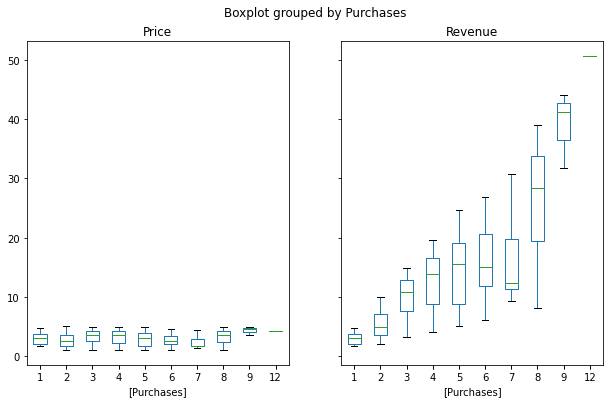

In [11]:
items.boxplot(by='Purchases', grid=False, figsize=(10, 6))

In [12]:
items.groupby('Purchases').mean().style.format({'Price': '${:,.2f}', 'Revenue': '${:,.2f}'})

,Price,Revenue
Purchases,,
1,$3.03,$3.03
2,$2.68,$5.36
3,$3.41,$10.21
4,$3.22,$12.86
5,$2.95,$14.76
6,$2.74,$16.45
7,$2.23,$15.59
8,$3.29,$26.30
9,$4.34,$39.03


In [22]:
sales_labels = ['Poor', 'Average', 'Top']
sales_bins = [0, 6.99, 16.99, 99]
items['Sales'] = pd.cut(items['Revenue'], bins=sales_bins, labels=sales_labels)
items.groupby('Sales').mean().style.format({'Price': '${:,.2f}', 'Purchases': '{:.2f}', 'Revenue': '${:.2f}'})

,Price,Purchases,Revenue
Sales,,,
Poor,$2.06,2.56,$4.49
Average,$3.07,4.28,$12.01
Top,$4.04,6.04,$24.08


In [24]:
popularity_labels = ['Poor', 'Average', 'Top']
popularity_bins = [0, 3, 7, 13]
items['Popularity'] = pd.cut(items['Purchases'], bins=popularity_bins, labels=popularity_labels)
items.groupby('Popularity').mean().style.format({'Price': '${:,.2f}', 'Purchases': '{:.2f}', 'Revenue': '${:.2f}'})

,Price,Purchases,Revenue
Popularity,,,
Poor,$3.08,2.28,$7.17
Average,$2.95,4.96,$14.37
Top,$3.60,8.54,$31.12


Item Analysis
----------------
The most popular item is 'Oathbreaker, Last Hope of the Breaking Storm,' which costs $4.23 and was purchased 12 times for a total of $50.76 in revenue. The most popular item among single-purchase users is 'Final Critic', which costs $4.61 and was purchased 6 times for a total of $32.27 in revenue. 'Oathbreaker' was the most popular item among 2-purchase users for a total of $25.38 in revenue.

In [25]:
items.loc[items['Popularity'] == 'Top'].sort_values(['Purchases', 'Revenue'], ascending=False).style.format({'Price': '${:,.2f}', 'Purchases': '{:.0f}', 'Revenue': '${:.2f}'})

,,Price,Purchases,Revenue,Sales,Popularity
,Item Name,,,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",$4.23,12,$50.76,Top,Top
82,Nirvana,$4.90,9,$44.10,Top,Top
145,Fiery Glass Crusader,$4.58,9,$41.22,Top,Top
108,"Extraction, Quickblade Of Trembling Hands",$3.53,9,$31.77,Top,Top
92,Final Critic,$4.88,8,$39.04,Top,Top
103,Singed Scalpel,$4.35,8,$34.80,Top,Top
59,"Lightning, Etcher of the King",$4.23,8,$33.84,Top,Top
72,Winter's Bite,$3.77,8,$30.16,Top,Top
60,Wolf,$3.54,8,$28.32,Top,Top


In [26]:
user_purchases = pd.DataFrame(data.groupby(['SN'])['Purchase ID'].count()).rename(columns={'Purchase ID':'User Purchases'})
data_with_purchase_count = data.join(user_purchases, on='SN', how='left')
popular_items_by_purchase = pd.DataFrame(data_with_purchase_count.groupby('User Purchases')['Item Name'].value_counts()).rename(columns={'Item Name':'Purchases'})
top5 = popular_items_by_purchase.groupby(level=0).head(5).join(round(data[['Item Name','Price']].groupby('Item Name').mean(),2), on='Item Name', how='left')
top5['Total Revenue'] = round(top5['Purchases'] * top5['Price'], 2)
top5

Purchases  Price  \
User Purchases Item Name                                                        
1              Final Critic                                          7   4.61   
               Fate, Vengeance of Eternal Justice                    6   1.54   
               Fiery Glass Crusader                                  6   4.58   
               Oathbreaker, Spellblade of Trials                     6   3.08   
               Apocalyptic Battlescythe                              5   1.97   
2              Oathbreaker, Last Hope of the Breaking Storm          6   4.23   
               Nirvana                                               5   4.90   
               Brutality Ivory Warmace                               4   2.42   
               Demise                                                4   1.61   
               Persuasion                                            4   3.22   
3              Extraction, Quickblade Of Trembling Hands             4   3.53   
               Brutality Ivory Warmace                               3   2.42   
               Fiery Glass Crusader                                  3   4.58   
               Final Critic                                          3   4.61   
               Ghastly Adamantite Protector                          3   3.58   
4              Exiled Doomblade                                      1   1.63   
               Freak's Bite, Favor of Holy Might                     1   4.14   
               Hellreaver, Heirloom of Inception                     1   4.93   
               Massacre                                              1   1.60   
               Misery's End                                          1   4.89   
5              Blazefury, Protector of Delusions                     1   4.64   
               Persuasion                                            1   3.22   
               Second Chance                                         1   2.52   
               Spada, Etcher of Hatred                               1   4.80   
               Warped Fetish                                         1   3.81   

                                                             Total Revenue  
User Purchases Item Name                                                    
1              Final Critic                                          32.27  
               Fate, Vengeance of Eternal Justice                     9.24  
               Fiery Glass Crusader                                  27.48  
               Oathbreaker, Spellblade of Trials                     18.48  
               Apocalyptic Battlescythe                               9.85  
2              Oathbreaker, Last Hope of the Breaking Storm          25.38  
               Nirvana                                               24.50  
               Brutality Ivory Warmace                                9.68  
               Demise                                                 6.44  
               Persuasion                                            12.88  
3              Extraction, Quickblade Of Trembling Hands             14.12  
               Brutality Ivory Warmace                                7.26  
               Fiery Glass Crusader                                  13.74  
               Final Critic                                          13.83  
               Ghastly Adamantite Protector                          10.74  
4              Exiled Doomblade                                       1.63  
               Freak's Bite, Favor of Holy Might                      4.14  
               Hellreaver, Heirloom of Inception                      4.93  
               Massacre                                               1.60  
               Misery's End                                           4.89  
5              Blazefury, Protector of Delusions                      4.64  
               Persuasion                                             3.22  
               Second Cha

User Analysis
------------
Users in this dataset made anywhere from 1-5 purchases for a total spend ranging from $1.00 to $18.96 per player. The bulk of users (93.4%) only made 1 (71.9%) or 2 (21.5%) purchases. They made a total of 662 purchases for $2,007.16 in total revenue. Their average purchase price was $3.04 for an average total spend of $3.73 per player. Only 38 (6.6%) players made 3 or more purchases for a total of 118 purchases and $372.61 in revenue.

In [27]:
users_grouped = data.groupby(['SN', 'Gender', 'Age'])
users = pd.DataFrame(users_grouped['Purchase ID'].count()).rename(columns={'Purchase ID':'Purchases'})
users['Avg Purchase'] = round(users_grouped['Price'].mean(), 2)
users['Total Spend'] = round(users_grouped['Price'].sum(), 2)
users['Items'] = users_grouped['Item Name'].unique()
users.sort_values('Purchases', ascending=False).head()

,,,Purchases,Avg Purchase,Total Spend,Items
SN,Gender,Age,,,,
Lisosia93,Male,25,5,3.79,18.96,"[Blazefury, Protector of Delusions, Warped Fet..."
Iral74,Male,21,4,3.40,13.62,"[Freak's Bite, Favor of Holy Might, Yearning M..."
Idastidru52,Male,24,4,3.86,15.45,"[Hellreaver, Heirloom of Inception, Warmonger,..."
Asur53,Male,26,3,2.48,7.44,"[Brutality Ivory Warmace, Suspension, Ghastly ..."
Inguron55,Male,23,3,3.70,11.11,"[Singed Onyx Warscythe, Fiery Glass Crusader, ..."


In [28]:
users.describe()

,Purchases,Avg Purchase,Total Spend
count,576.000000,576.000000,576.000000
mean,1.354167,3.046059,4.131545
std,0.626585,1.069450,2.404705
min,1.000000,1.000000,1.000000
25%,1.000000,2.147500,2.450000
50%,1.000000,3.090000,3.720000
75%,2.000000,3.862500,4.902500
max,5.000000,4.990000,18.960000


In [29]:
purchases = pd.DataFrame(users[['Purchases','Total Spend']].groupby('Purchases').count()).rename(columns={'Total Spend':'Users'})
purchases['% of Users'] = purchases['Users'] / purchasing_players
purchases['Total Revenue'] = users[['Purchases','Total Spend']].groupby('Purchases').sum()
purchases['% of Revenue'] = purchases['Total Revenue'] / total_revenue
purchases['Avg Price'] = round(users[['Purchases', 'Avg Purchase']].groupby('Purchases').mean(), 2)
purchases.style.format({'% of Users':'{:.1%}', 'Total Revenue':'${:,.2f}', '% of Revenue':'{:.1%}', 'Avg Price':'${:,.2f}'})

,Users,% of Users,Total Revenue,% of Revenue,Avg Price
Purchases,,,,,
1,414,71.9%,"$1,263.38",53.1%,$3.05
2,124,21.5%,$743.78,31.3%,$3.00
3,35,6.1%,$324.58,13.6%,$3.09
4,2,0.3%,$29.07,1.2%,$3.63
5,1,0.2%,$18.96,0.8%,$3.79


In [30]:
#users.groupby('Purchases')['Items'].loc[]
purchases.iloc[1, :]

Users            124.000000
% of Users         0.215278
Total Revenue    743.780000
% of Revenue       0.312543
Avg Price          3.000000
Name: 2, dtype: float64

In [31]:
print(users.loc[users['Purchases'] < 3].mean())
print()
print(users[['Purchases', 'Total Spend']].loc[users['Purchases'] < 3].sum())

Purchases       1.230483
Avg Purchase    3.039572
Total Spend     3.730781
dtype: float64

Purchases       662.00
Total Spend    2007.16
dtype: float64


In [32]:
print(users.loc[users['Purchases'] >= 3].mean())
print()
print(users[['Purchases', 'Total Spend']].loc[users['Purchases'] >= 3].sum())

Purchases       3.105263
Avg Purchase    3.137895
Total Spend     9.805526
dtype: float64

Purchases      118.00
Total Spend    372.61
dtype: float64


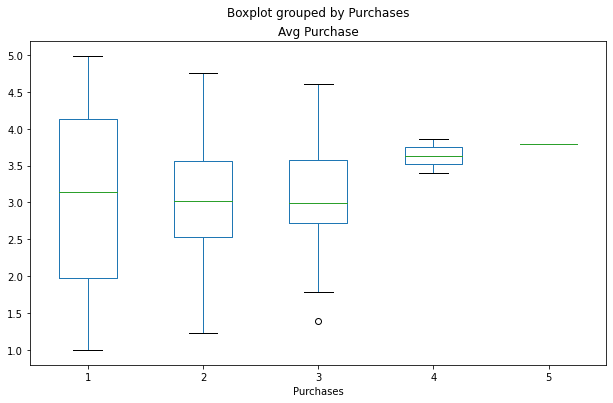

In [33]:
users.boxplot(column='Avg Purchase', by='Purchases', grid=False, figsize=(10,6))